In [21]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

In [22]:
#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#image = Image.open(requests.get(url, stream=True).raw)

In [23]:
image = Image.open('Test3.jpeg')

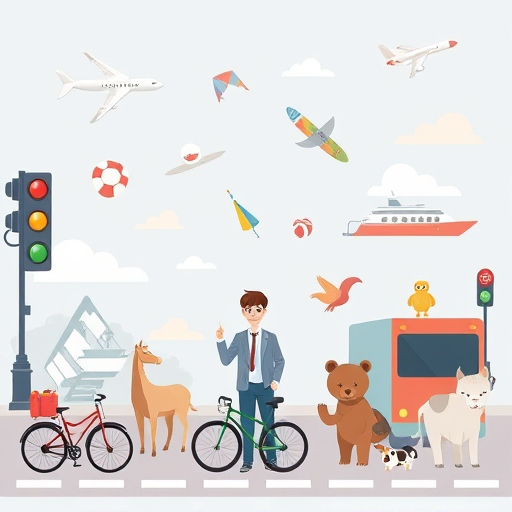

In [24]:
image

In [25]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

In [26]:
inputs = processor(images=image, return_tensors="pt")

In [27]:
inputs

{'pixel_values': tensor([[[[1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
          [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
          [1.9920, 1.9920, 1.9749,  ..., 1.9749, 1.9749, 1.9749],
          ...,
          [2.0605, 2.0605, 2.0434,  ..., 2.0605, 2.0434, 2.0434],
          [2.0263, 2.0263, 2.0263,  ..., 2.0605, 2.0434, 2.0263],
          [2.0092, 2.0092, 2.0092,  ..., 2.0605, 2.0434, 2.0263]],

         [[2.2360, 2.2360, 2.2360,  ..., 2.2360, 2.2360, 2.2360],
          [2.2360, 2.2360, 2.2360,  ..., 2.2360, 2.2360, 2.2360],
          [2.2360, 2.2360, 2.2185,  ..., 2.2185, 2.2185, 2.2185],
          ...,
          [2.2535, 2.2535, 2.2360,  ..., 2.2535, 2.2360, 2.2360],
          [2.2185, 2.2185, 2.2185,  ..., 2.2535, 2.2360, 2.2185],
          [2.2010, 2.2010, 2.2010,  ..., 2.2535, 2.2360, 2.2185]],

         [[2.4657, 2.4657, 2.4657,  ..., 2.5006, 2.5006, 2.5006],
          [2.4657, 2.4657, 2.4657,  ..., 2.5006, 2.5006, 2.5006],
          [2.4657, 2.4657

In [28]:
target_sizes = torch.tensor([image.size[::-1]])

In [29]:
target_sizes

tensor([[512, 512]])

In [30]:
outputs = model(**inputs)

In [31]:
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

In [32]:
results

{'scores': tensor([0.9975, 0.9870, 0.9340, 0.9946, 0.9838, 0.9962, 0.9778, 0.9894, 0.9997,
         0.9360, 0.9231, 0.9078, 0.9854, 0.9974, 0.9758, 0.9986],
        grad_fn=<IndexBackward0>),
 'labels': tensor([ 2, 38, 10, 19,  5, 10, 38,  5,  1, 38, 18, 18, 38, 32, 38,  2]),
 'boxes': tensor([[ 19.4514, 396.0063, 132.7417, 474.2773],
         [212.8804,  70.0478, 247.0600, 101.1406],
         [477.2578, 270.3569, 493.4062, 307.2153],
         [129.2797, 342.0533, 195.4226, 456.6926],
         [374.9394,  39.7529, 460.6571,  76.4690],
         [ 18.3229, 169.7876,  54.7373, 266.0198],
         [226.5942, 189.3622, 260.0646, 234.6138],
         [ 55.1776,  52.4325, 166.3024, 123.4310],
         [215.2414, 291.0599, 282.8456, 473.1460],
         [312.6094, 275.3449, 363.7979, 313.2498],
         [419.0017, 365.1373, 492.8115, 471.0843],
         [375.8946, 445.1110, 419.5520, 472.4519],
         [286.0482, 105.8619, 349.4264, 163.3378],
         [248.6622, 332.7569, 257.6035, 377.7638],


In [33]:
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected bicycle with confidence 0.998 at location [19.45, 396.01, 132.74, 474.28]
Detected kite with confidence 0.987 at location [212.88, 70.05, 247.06, 101.14]
Detected traffic light with confidence 0.934 at location [477.26, 270.36, 493.41, 307.22]
Detected horse with confidence 0.995 at location [129.28, 342.05, 195.42, 456.69]
Detected airplane with confidence 0.984 at location [374.94, 39.75, 460.66, 76.47]
Detected traffic light with confidence 0.996 at location [18.32, 169.79, 54.74, 266.02]
Detected kite with confidence 0.978 at location [226.59, 189.36, 260.06, 234.61]
Detected airplane with confidence 0.989 at location [55.18, 52.43, 166.3, 123.43]
Detected person with confidence 1.0 at location [215.24, 291.06, 282.85, 473.15]
Detected kite with confidence 0.936 at location [312.61, 275.34, 363.8, 313.25]
Detected dog with confidence 0.923 at location [419.0, 365.14, 492.81, 471.08]
Detected dog with confidence 0.908 at location [375.89, 445.11, 419.55, 472.45]
Detected ki

In [34]:
pip install distinctipy


Note: you may need to restart the kernel to use updated packages.


In [35]:
scores = []
labels = []
boxes = []
for i in results:
    if i == 'scores':
        scores.append(results[i].tolist())
    elif i == 'labels':
        labels.append(results[i].tolist())
    else:
        boxes.append(list(results[i].tolist()))



In [36]:
#print(boxes[0])
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
img = read_image('Test3.jpeg')

In [37]:
# bounding box in (xmin, ymin, xmax, ymax) format
#bbox1 = [30, 45, 330, 450]
#bbox2 = [320, 150, 690, 460]
bbox = boxes[0]
labels = labels[0]
labels = [model.config.id2label[lab] for lab in labels]
bbox = torch.tensor(bbox, dtype=torch.int)
print(bbox)
print(bbox.size())

tensor([[ 19, 396, 132, 474],
        [212,  70, 247, 101],
        [477, 270, 493, 307],
        [129, 342, 195, 456],
        [374,  39, 460,  76],
        [ 18, 169,  54, 266],
        [226, 189, 260, 234],
        [ 55,  52, 166, 123],
        [215, 291, 282, 473],
        [312, 275, 363, 313],
        [419, 365, 492, 471],
        [375, 445, 419, 472],
        [286, 105, 349, 163],
        [248, 332, 257, 377],
        [290, 218, 312, 238],
        [189, 396, 306, 473]], dtype=torch.int32)
torch.Size([16, 4])


In [38]:
import distinctipy
colors = distinctipy.get_colors(len(set(labels)))
int_colors = [tuple(int(c*255) for c in color) for color in colors]

In [39]:
img=draw_bounding_boxes(img, bbox,width=3,labels= labels,colors=[int_colors[i] for i in [list(set(labels)).index(label) for label in labels]],fill =False,font_size=20)
img = torchvision.transforms.ToPILImage()(img)
img.show()

/Users/adityapatil/anaconda3/lib/python3.11/site-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")
